Exploratory Data Analysis for House Prices in Ames, Iowa. 

Dataset obtained from: 
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques 

The following method was used as reference:
https://www.kaggle.com/code/aibamayaalvarez/house-prices-eda-feature-selection-stacking 

Several code fragments where used from the previous guide. 

02-02-2023

In [1]:
#Import libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical tests

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
palettes=['BuPu', 'Purples_r','YlGnBu_r', 'cool','coolwarm_r', 'gist_rainbow', 'gnuplot2', 'hsv_r']
sns.set_palette(palettes[1])

plt.rcParams["axes.formatter.useoffset"] = True

# set pandas options to display all data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

In [2]:
#Import Train Dataset
train = pd.read_csv('./Resources/train.csv', index_col=[0])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Import TestDataset
test = pd.read_csv('./Resources/test.csv', index_col=[0])
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Exploratory Analaysis

Data types:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
#Count numerical and categorical data types for each dataset


train_cat = train.dtypes[train.dtypes==object]
train_num = train.dtypes[train.dtypes!=object]

test_cat = test.dtypes[test.dtypes==object]
test_num = test.dtypes[test.dtypes!=object]

#Train Dataset
print('Train Data | Data Types')
print('Object: ',train_cat.count())
print('Numeric: ', train_num.count())

print()

#Test Dataset
print('Test Data | Data Types:')
print('Object: ', test_cat.count())
print('Numeric: ',test_num.count())


Train Data | Data Types
Object:  43
Numeric:  37

Test Data | Data Types:
Object:  43
Numeric:  36


After a careful review of the Data Description document provided, we can observe that, even though certain variables contain numerical values, they are used to classify certain information: 

    1. SSubClass: Identifies the type of dwelling involved in the sale.
    2. OverallQual: Rates the overall material and finish of the house.
    3. OverallCond: Rates the overall condition of the house.
    
Based on the abve information, such variables will be converted to objects. 
    


In [7]:
train[['MSSubClass', 'OverallQual', 'OverallCond']] = train[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
test[['MSSubClass', 'OverallQual', 'OverallCond']] = test[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

Missing values: 
    
Variables with more than 40% of missing values will be dropped, for the rest, missing values in categorical variables will be replaced with "NA" and with 0 for numerical variables. 


In [8]:
#Finding missing values in Train Dataset
missing_train=train.isnull().sum()
missing_train=missing_train[missing_train>0] # Extracting those Columns having missing value Greater Than Zero
missing_above_train=missing_train[missing_train>(40/100)*1450] #we will later drop those columns having more than 40% missing values

print(f'The following columns have more than 40% missing values in Train Dataset:\n{missing_above_train}')

The following columns have more than 40% missing values in Train Dataset:
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


In [9]:
#Finding missing values in Test Dataset
missing_test=test.isnull().sum()
missing_test=missing_test[missing_test>0] # Extracting those Columns having missing value Greater Than Zero
missing_above_test=missing_test[missing_test>(40/100)*1450] #we will later drop those columns having more than 40% missing values

print(f'The following columns have more than 40% missing values in Test Dataset:\n{missing_above_test}')

The following columns have more than 40% missing values in Test Dataset:
Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64


In [10]:
#Loop through Train dataset -- code to be revised
for i in train:
    if i in train_cat and i in missing_above_train: #If variable is categorical and has more than 40% of missing values
        train = train.drop(i, axis=1) #Needs to be dropped -- fix code
    elif i in train_cat and i not in missing_above_train: #If variable is categorical and has LESS than 40% of missing values
        i = 'NA' #Replaced by 'NA'
    elif i in train_num and i in missing_above_train: #If variable is numerical and has more than 40% of missing values
        train = train.drop(i, axis=1) #Needs to be dropped -- fix code
    elif i in train_num and i not in missing_above_train: #If variable is numerical and has LESS than 40% of missing values
        i = 0 #Replaced by 0
    

In [11]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
#Loop through Test dataset -- code to be revised
for i in test:
    if i in test_cat and i in missing_above_test: #If variable is categorical and has more than 40% of missing values
        test = test.drop(i, axis=1) #Needs to be dropped -- fix code
    elif i in test_cat and i not in missing_above_test: #If variable is categorical and has LESS than 40% of missing values
        i = 'NA' #Replaced by 'NA'
    elif i in test_num and i in missing_above_test: #If variable is numerical and has more than 40% of missing values
        test = test.drop(i, axis=1) #Needs to be dropped -- fix code
    elif i in test_num and i not in missing_above_test: #If variable is numerical and has LESS than 40% of missing values
        i = 0 #Replaced by 0
    

In [13]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


Exploring Target variable (SalePrice)

In [14]:
train.SalePrice.describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [15]:
def targe_plot(target):
    fig, ax = plt.subplots(1, 3,figsize=(18,6), dpi=100)

    sns.histplot(x=target, data=train, kde=True, element="step", stat="density", ax=ax[0])

    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,target], plot = ax[1])

    sns.boxplot(x=target, data=train,  ax=ax[2])
    ax[0].set_title(f"Skewness: {train[target].skew()}  \n Kurtosis: {train[target].kurt()}", fontsize=14, )

    plt.suptitle(target, fontsize=18)
    fig.tight_layout()
    plt.show()

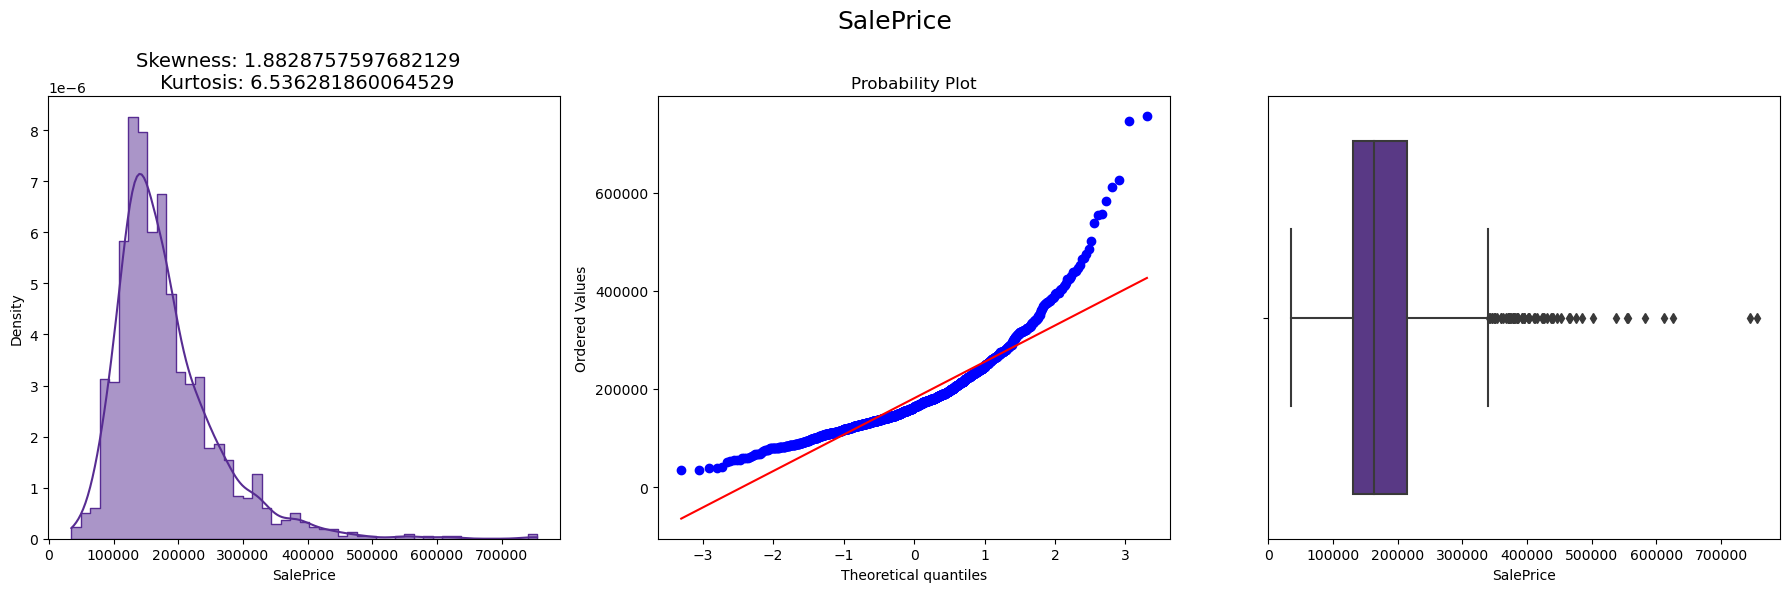

In [16]:
targe_plot('SalePrice')

1. Distribution of target variable is positively skewed and observes kurtosis of 6.53, thus target variable is not normally distributed. 
2. Boxplot shows presence of outliers.

Logarithmic transformation will be attempted to normalize distribution of target variable.`

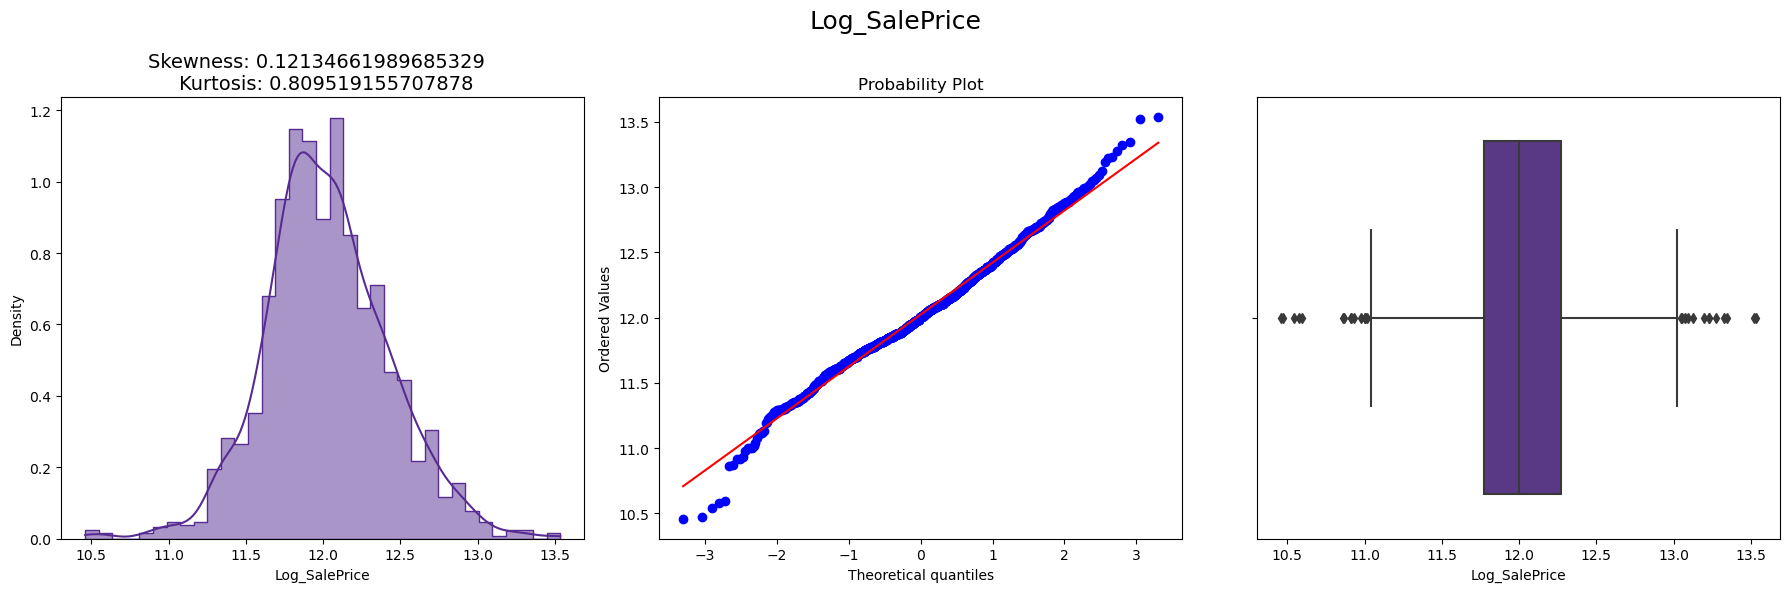

In [17]:
train['Log_SalePrice'] = np.log1p(train.SalePrice)
targe_plot('Log_SalePrice')

With skewness of 0.12 and Kurtosis of 0.80, normal distribution can be assumed.

Measuring correlation

Linearity of relationship between target variable and explanatory variables is not assumed, there is ordinal and/or rank data present thus Spearman correlation will be used. 



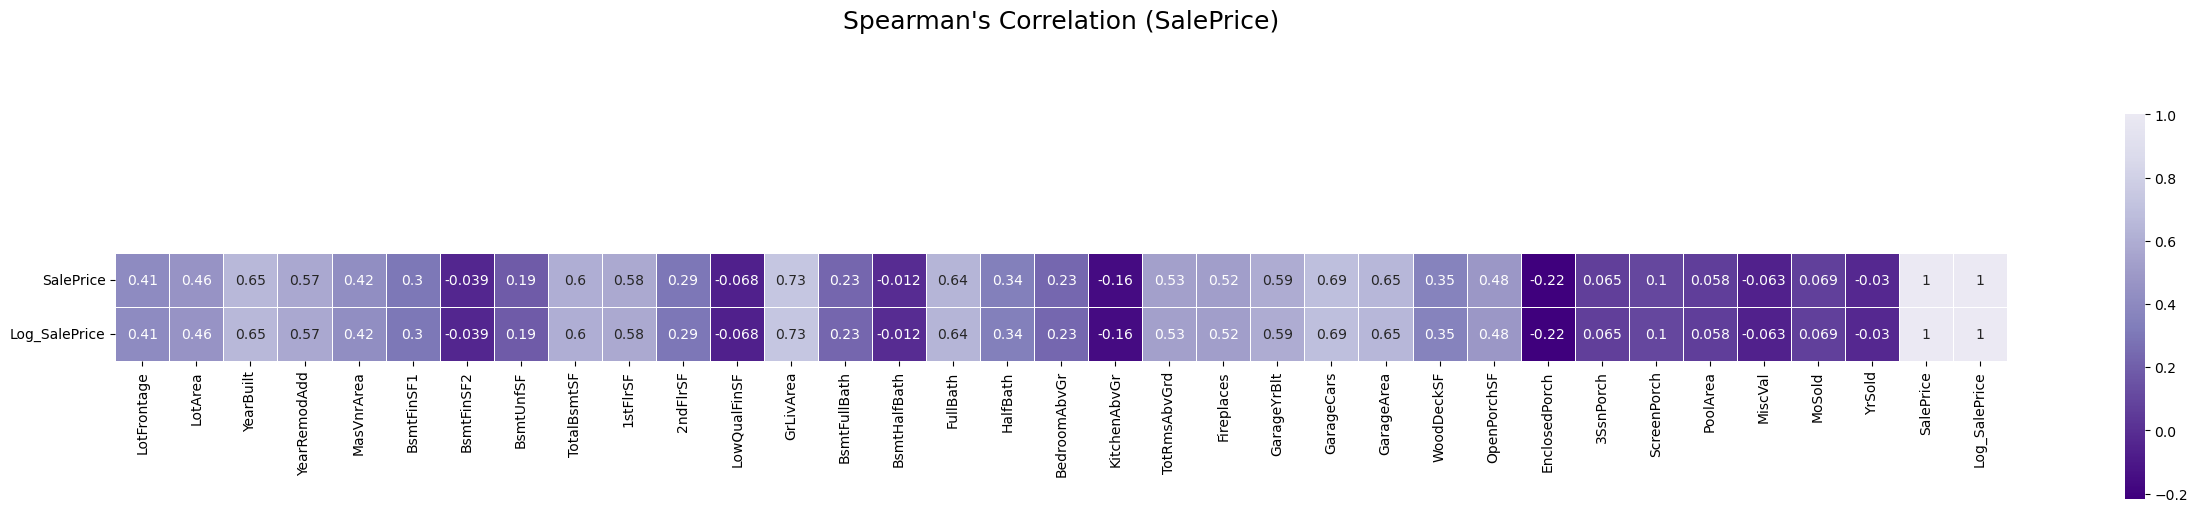

In [18]:
mat_corr=train.corr(method='spearman')[['SalePrice', 'Log_SalePrice']]

plt.figure(figsize=(25,8), dpi=100)

sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1, cmap=palettes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation (SalePrice)", fontsize=18, y=3)
plt.tight_layout()
plt.show()

Numerical variables with correlation higher than |0.50| will be selected for our model.

In [19]:
num_var = mat_corr[abs(mat_corr.SalePrice)>0.5].index.to_list()
num_var

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'Log_SalePrice']

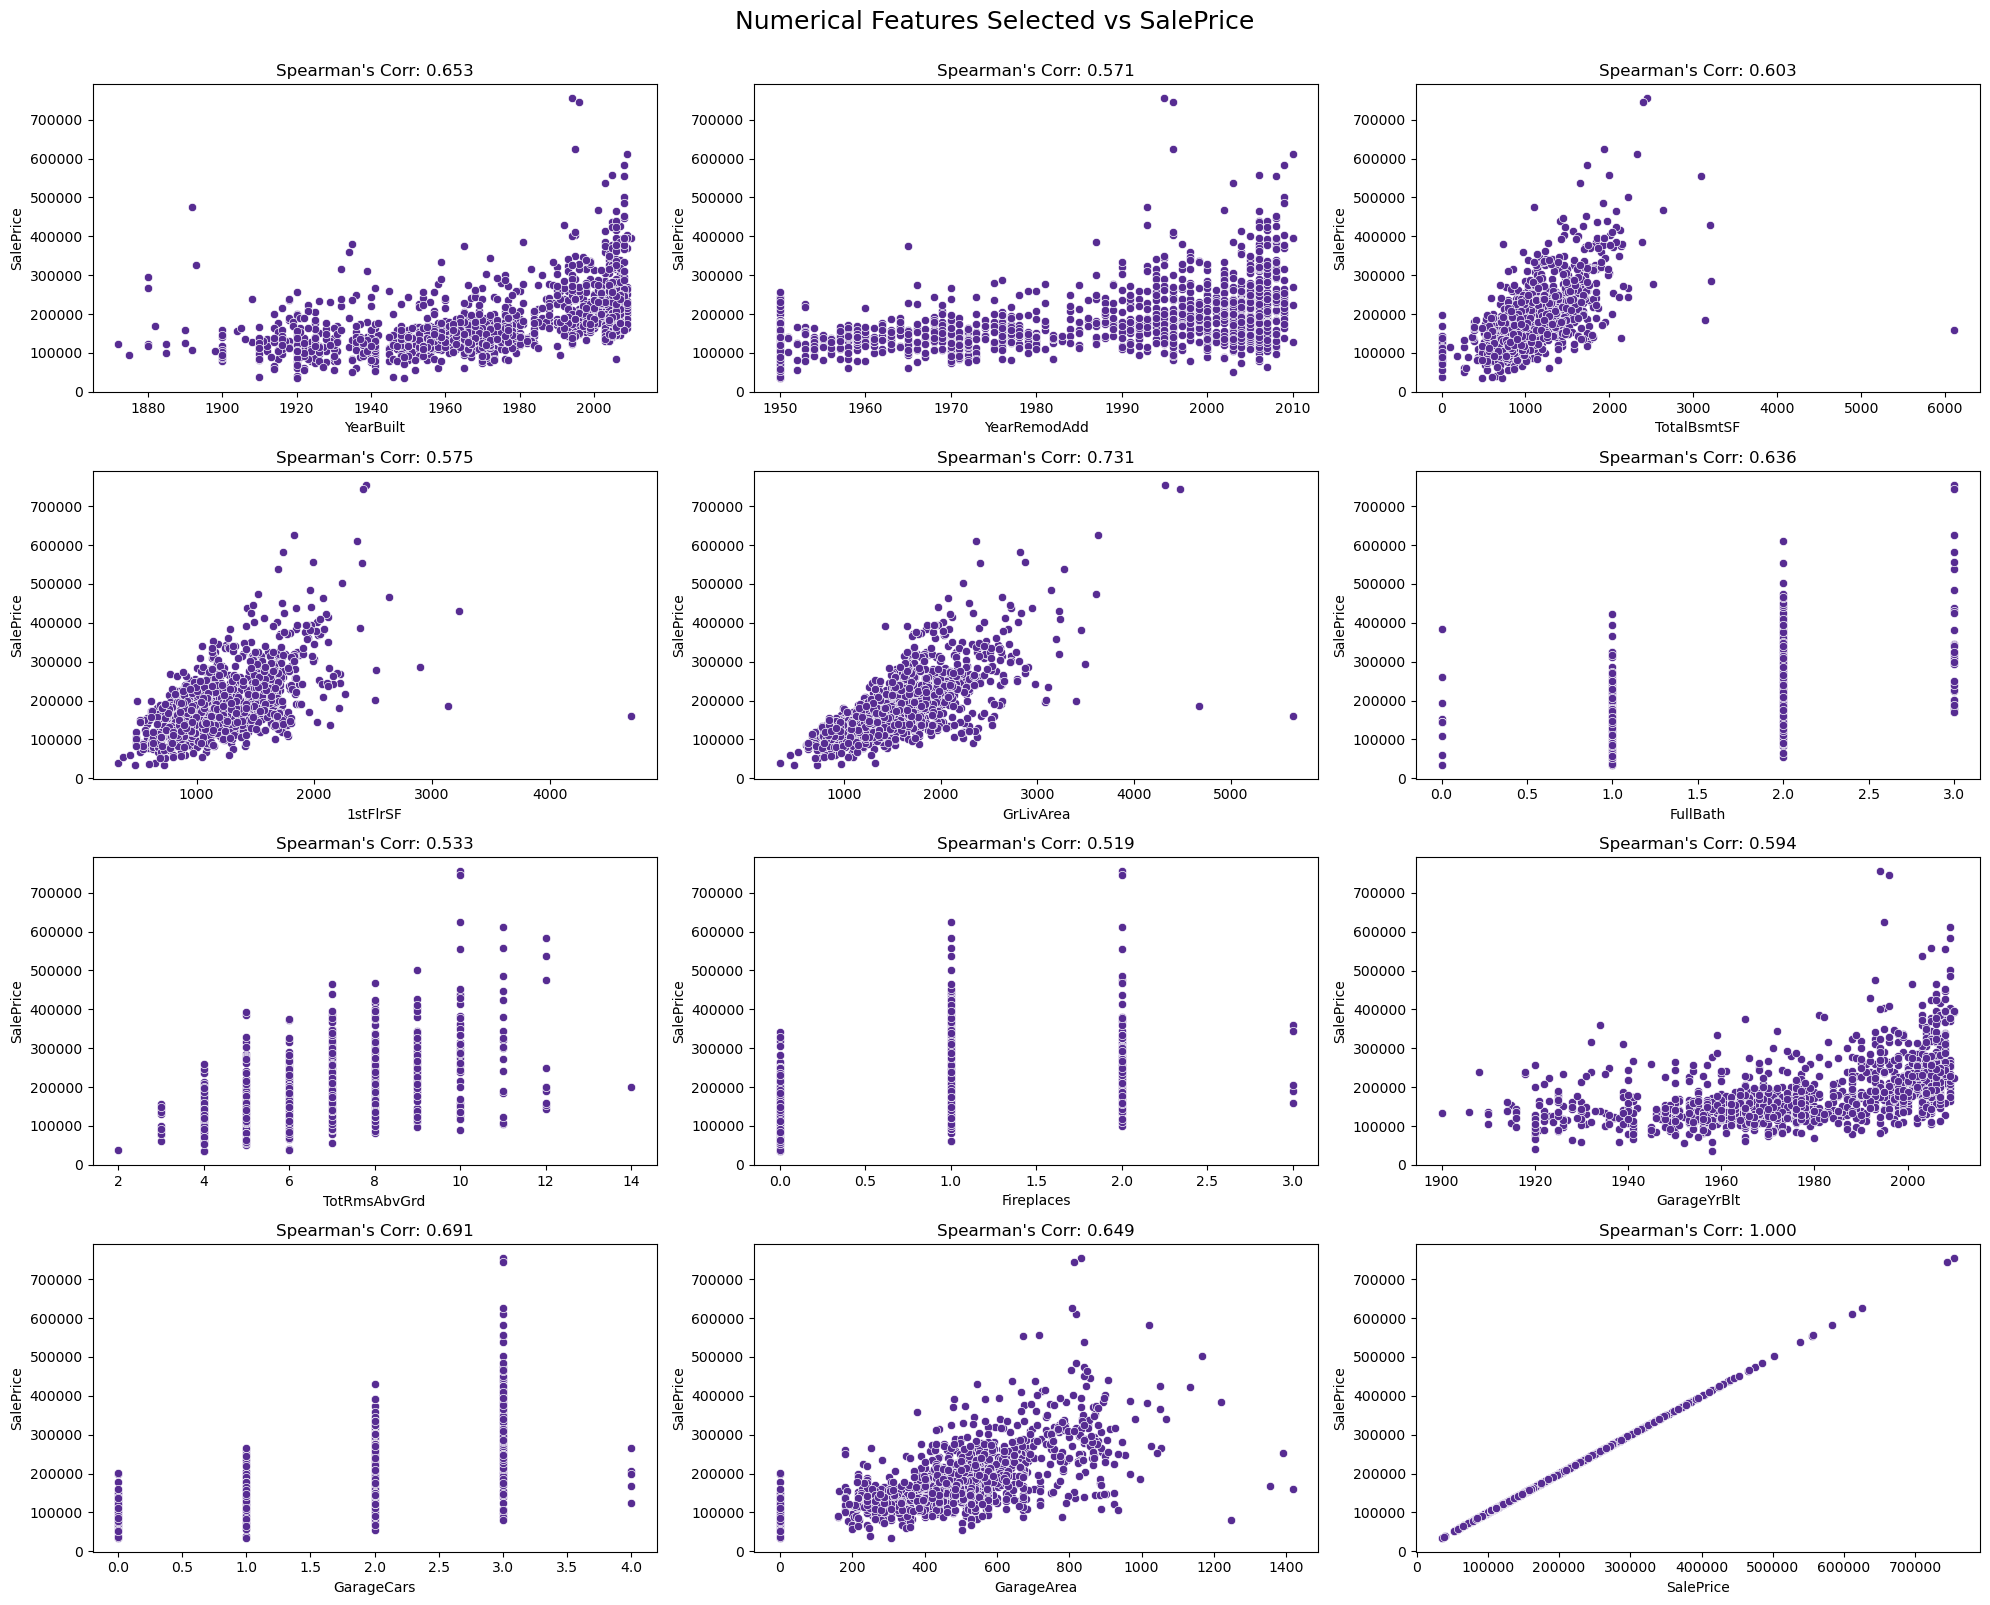

In [20]:
ncols = 3
nrows = round(len(num_var)/ncols)
fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=100)
for idx, col in enumerate(num_var[:-1]):
    chart = sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_title(f"Spearman's Corr: {mat_corr.SalePrice[col]:.3f}")

fig.suptitle('Numerical Features Selected vs SalePrice', fontsize=18 , y=1)
fig.tight_layout()
plt.show()

Spearman correlation between selected numerical values

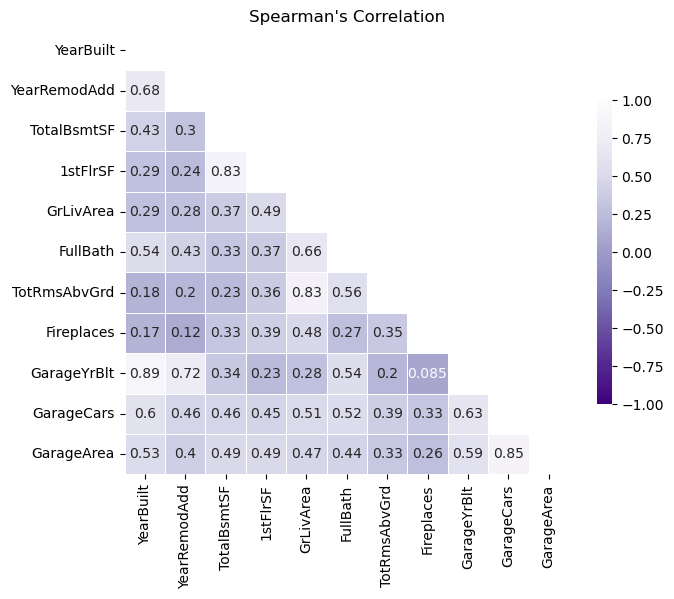

In [21]:
plt.figure(figsize=(7,7), dpi=100)
mat_corr=train[num_var[:-2]].corr(method='spearman')

sns.heatmap(mat_corr, annot=True, mask=np.triu(np.ones_like(mat_corr, dtype=bool)), center=0, vmax=1, vmin=-1, cmap=palettes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation", fontsize=12 )
plt.tight_layout()
plt.show()

Strong correlation observed between following variables: 
    YearRemodAdd and YearBuilt
    TotRmsAbvGrd and GrLivArea
    GarageYrBlt and YearBuilt
    GarageYrBlt and YearRemodAdd
    GarageCars and GrageArea
    1stFlrSF and TotalBsmtSF

Correlation of Categorical variables.

For this case, assuming categorical independent variables and numerical dependent variable, an Analysis of Variance (ANOVA) test will be performed.

In [22]:
#Building anova one-way model using categorial variables from train_cat
anova_feat = train.columns[train.dtypes=='object'].to_list()

anovaStats = []

for var in anova_feat:
    catGrouplist = train.groupby(var).Log_SalePrice.apply(list)
    anovaStats.append([var, *stats.f_oneway(*catGrouplist)])
    
anova_df = pd.DataFrame(anovaStats, columns=['Feature', 'statistic', 'pvalue'])


In [23]:
pd.set_option('display.float_format', lambda x: '%.15f' % x) #display values as decimals instead of scientific notation
anova_df

,Feature,statistic,pvalue
0,MSSubClass,50.866063478410503,0.000000000000000
1,MSZoning,77.607607196003912,0.000000000000000
2,Street,4.814434444770553,0.028379646829017
3,LotShape,46.728785252059104,0.000000000000000
4,LandContour,12.767286297599943,0.000000030861539
5,Utilities,0.232690257893945,0.629608587053647
6,LotConfig,8.692442396648316,0.000000621454833
7,LandSlope,1.083049609790272,0.338833876906621
8,Neighborhood,79.520526119648110,0.000000000000000
9,Condition1,8.037521352262097,0.000000000117345


Considering a p-value of less than 0.05 for statistical significance, the selected categorical variables are the following:


In [24]:
cat_feat_sel = anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28].Feature
anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28]

,Feature,statistic,pvalue
0,OverallQual,332.166959793466788,0.000000000000000
1,Neighborhood,79.520526119648110,0.000000000000000
2,ExterQual,415.304259018594109,0.000000000000000
3,KitchenQual,393.320922381130799,0.000000000000000
4,BsmtQual,364.727914150732772,0.000000000000000
5,GarageFinish,328.927387396587449,0.000000000000000
6,MSSubClass,50.866063478410503,0.000000000000000
7,Foundation,126.806778845876252,0.000000000000000
8,GarageType,101.162829478845012,0.000000000000000
9,HeatingQC,110.820423219917600,0.000000000000000


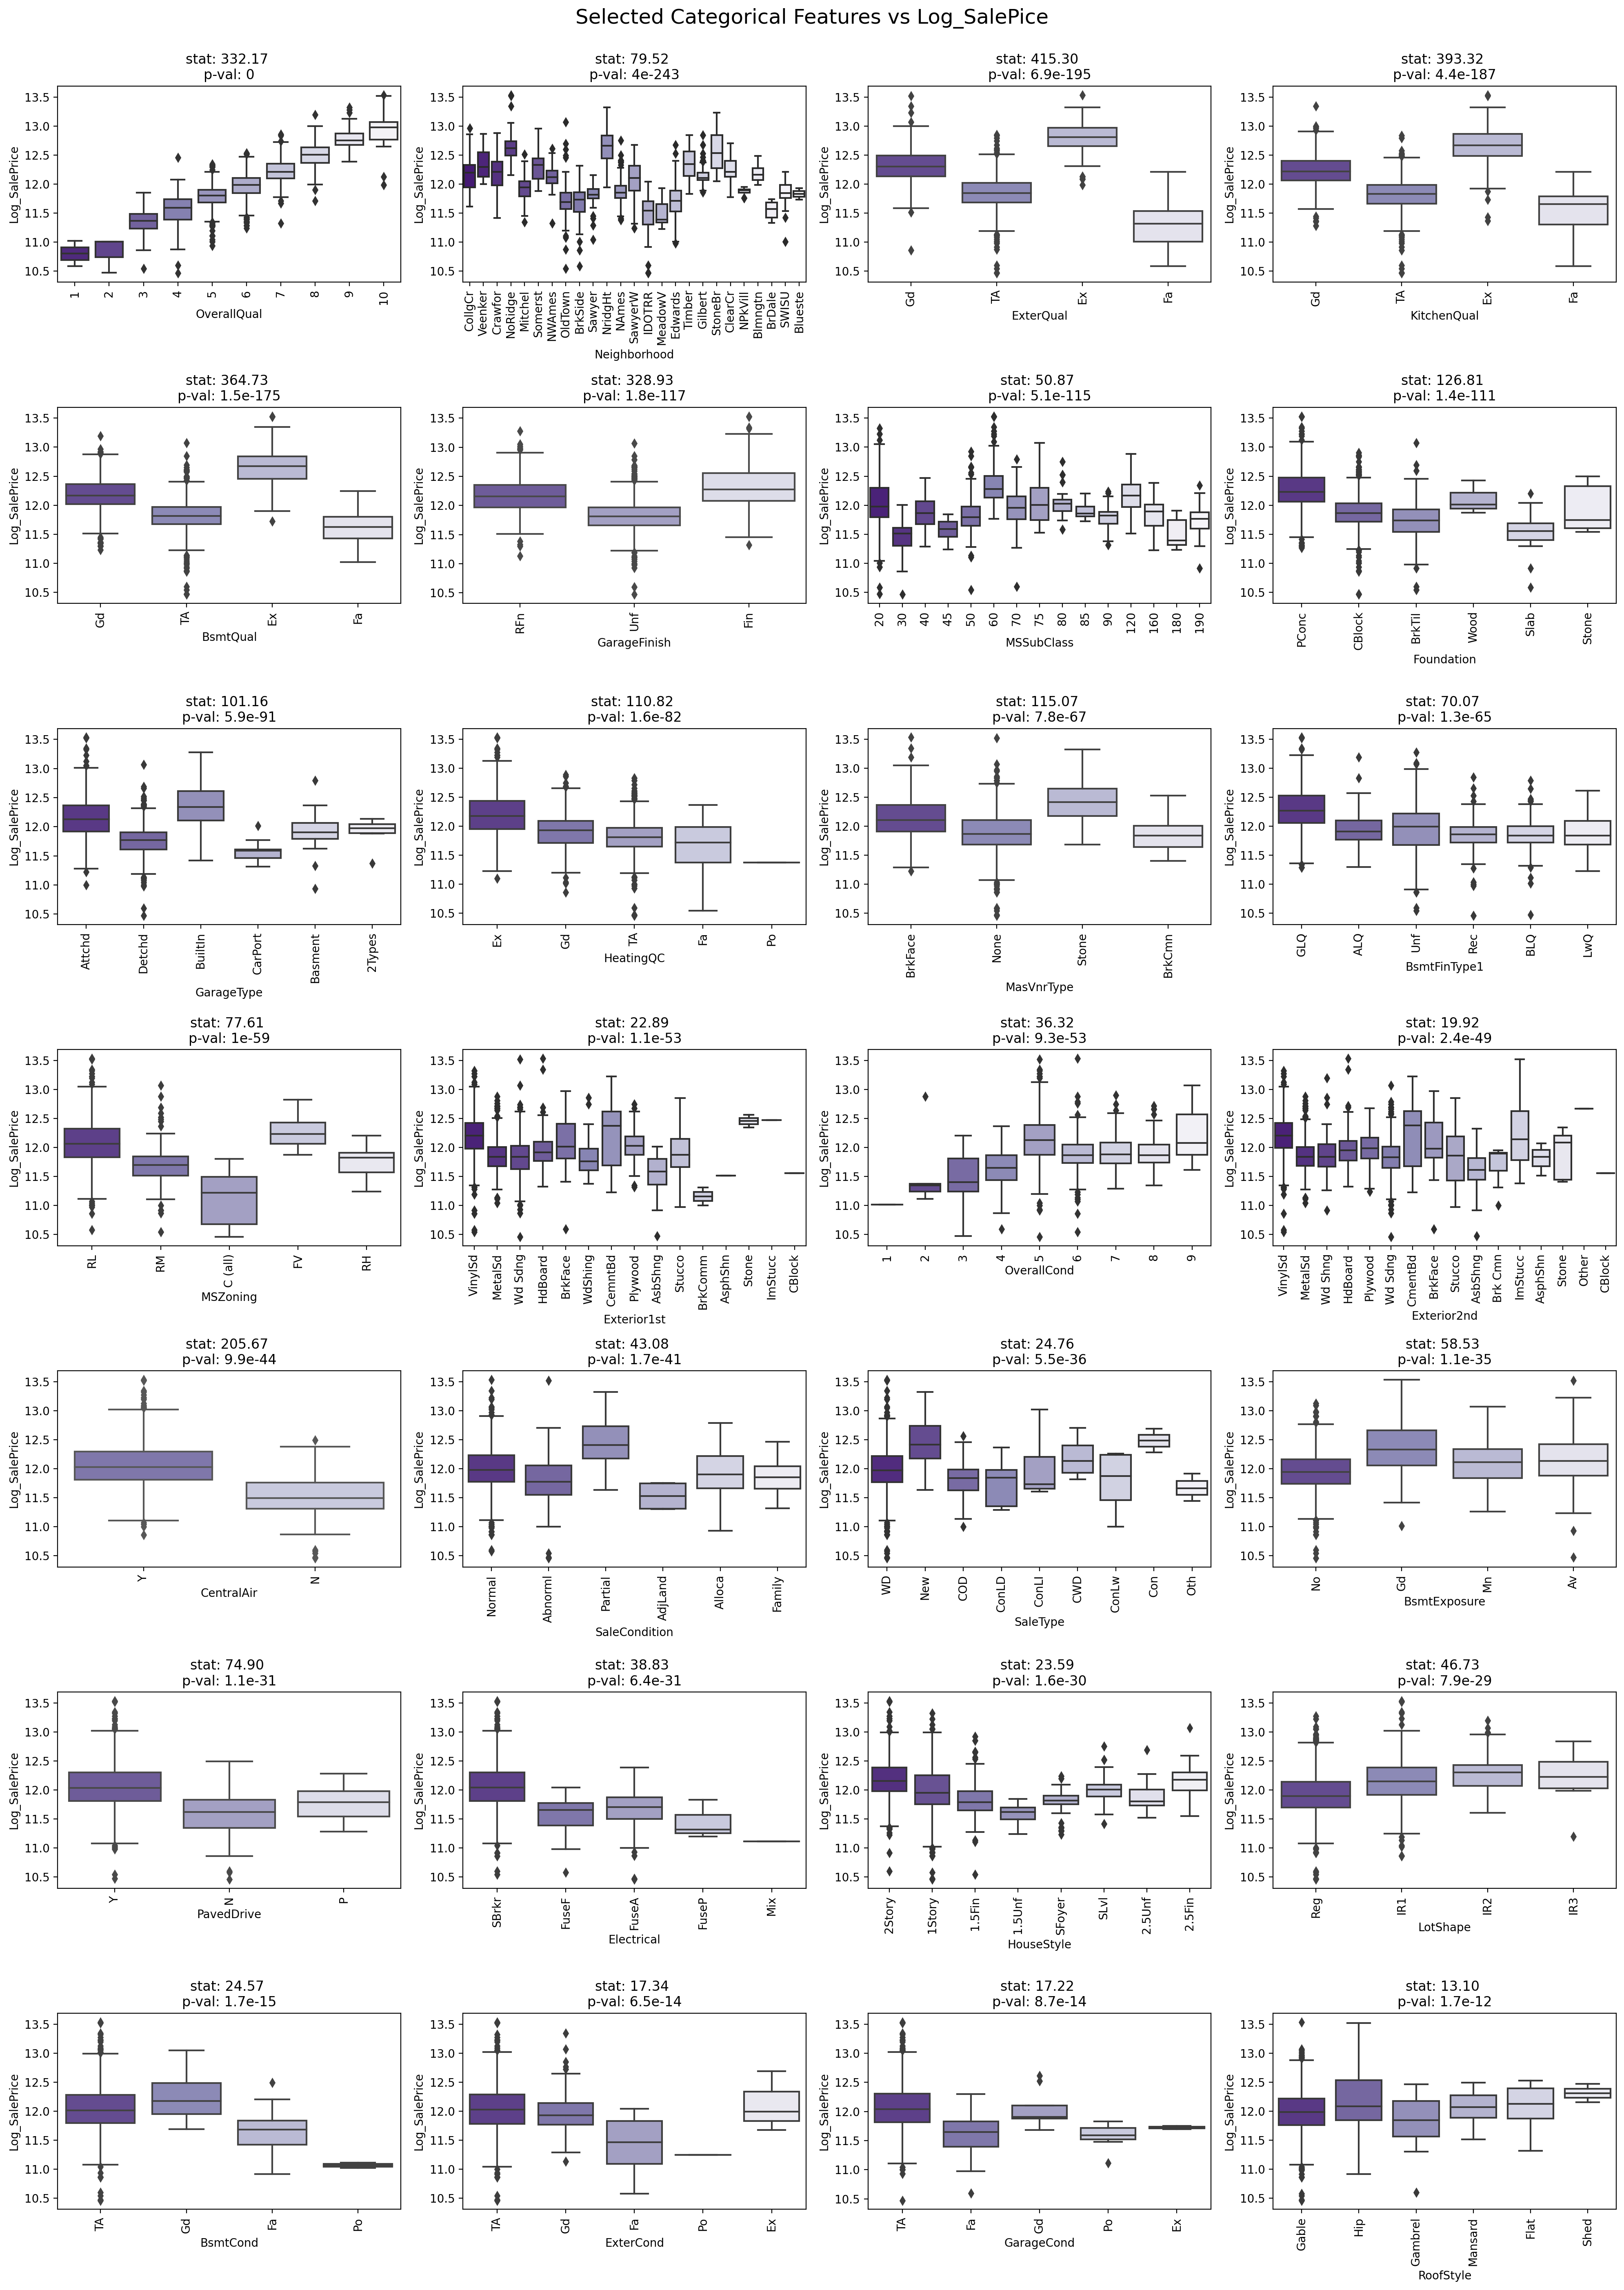

In [25]:
ncols = 4 
nrows = round(len(cat_feat_sel)/ncols)

fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=200)

for idx, col in enumerate(cat_feat_sel):
    chart=sns.boxplot(x=col, y='Log_SalePrice', data=train, ax=ax[idx//ncols, idx%ncols],  palette=palettes[1])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    arr = anova_df.loc[anova_df.Feature==col, ['statistic', 'pvalue']].values[0]
    chart.set_title(f"stat: {arr[0]:.2f} \np-val: {arr[1]:.2g}")

fig.suptitle('Selected Categorical Features vs Log_SalePice', fontsize=18 , y=1)
plt.tight_layout()
plt.show()

Tu furthter the analysis of relationship within the group of selected categorical variables, a chi-square matrix test will be performed: 

In [26]:
# Assiging column names to row indexs 
chi2matrix=pd.DataFrame(train[cat_feat_sel],columns=cat_feat_sel,index=cat_feat_sel)
pd.set_option('display.float_format', lambda x: '%.05f' % x) #display values as decimals instead of scientific notation
for icol in cat_feat_sel: # Outer loop
    for jcol in cat_feat_sel: # inner loop
        
        # Converting to cross tab as for CHi-square test we have to first convert variables into contigency table
        crosstab=pd.crosstab(train[icol],train[jcol])
      
        #Getting p-value and other usefull information
        stat,p,dof,expected = stats.chi2_contingency(crosstab)

        # Rounding very small p-values to zero
        chi2matrix.loc[icol,jcol]= p
        
        # As mentioned above Expected frequencies should be at least 5 for the majority (80%) of the cells.
        # Here we are checking expected frequency of each group
        cntexpected=expected[expected<5].size
        #Getting percentage 
        perexpected=((expected.size-cntexpected)/expected.size)*100

        if perexpected<20:
            chi2matrix.loc[icol,jcol]=1
        if icol==jcol:
             chi2matrix.loc[icol,jcol]=0.00


In [27]:
chi2matrix

Feature,OverallQual,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,MSSubClass,Foundation,GarageType,HeatingQC,MasVnrType,BsmtFinType1,MSZoning,Exterior1st,OverallCond,Exterior2nd,CentralAir,SaleCondition,SaleType,BsmtExposure,PavedDrive,Electrical,HouseStyle,LotShape,BsmtCond,ExterCond,GarageCond,RoofStyle
Feature,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OverallQual,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Neighborhood,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000
ExterQual,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02037,0.00000
KitchenQual,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
BsmtQual,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
GarageFinish,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MSSubClass,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Foundation,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
GarageType,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00013,0.00485,0.00000,0.00035


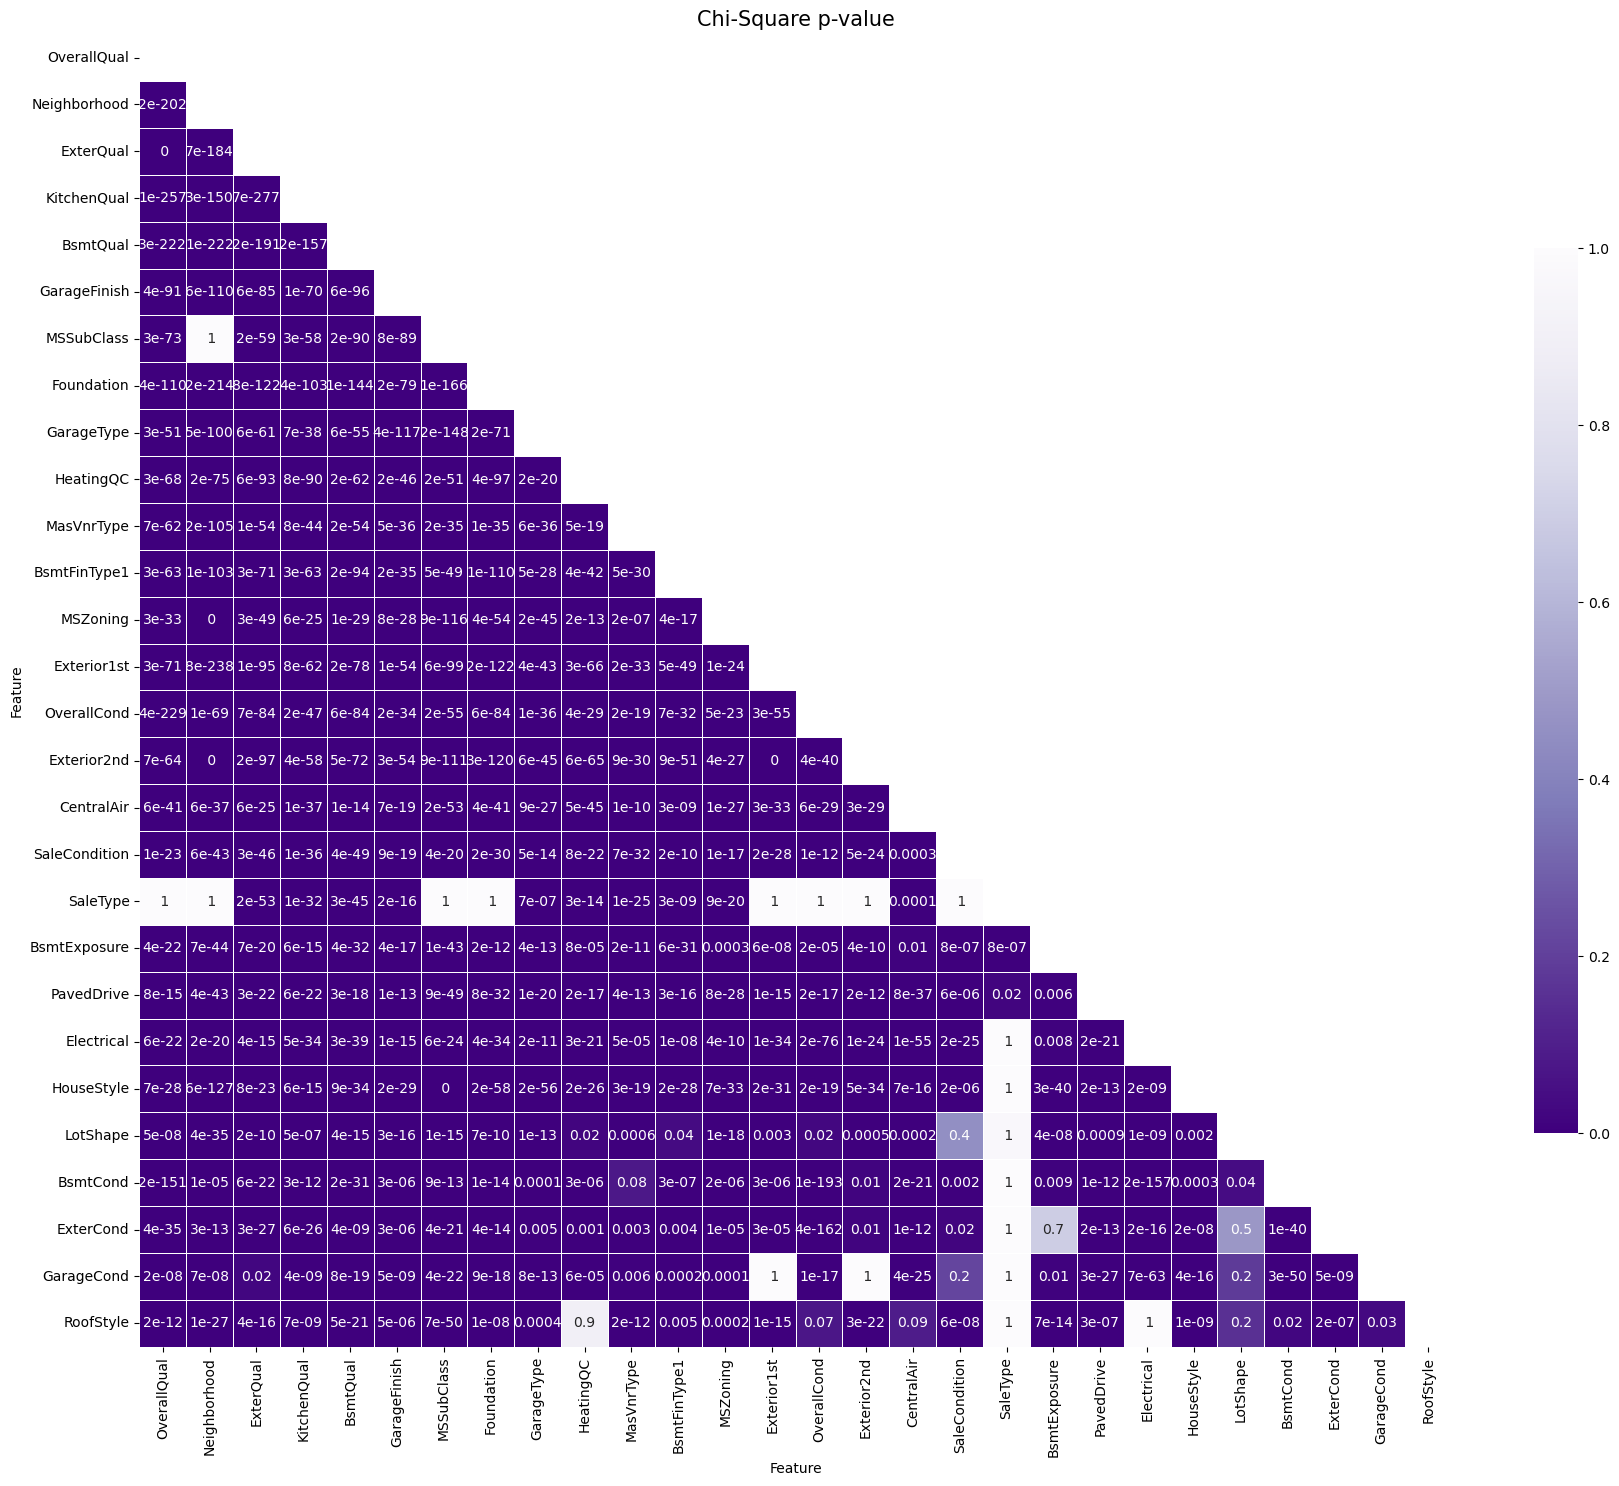

In [28]:

plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=np.triu(np.ones_like(chi2matrix, dtype=bool)), 
            cmap=palettes[1], square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Chi-Square p-value", fontsize=15 )
plt.tight_layout()
plt.show()

#NOTE: Prevent matplotlib from providing scientific notation 

In [29]:
print('*'*50)
print(f'The selected numerical variables are the following: \n{num_var}')
print('*'*50)
print(f'The selected categorical values are the following: \n{cat_feat_sel.to_list()}')
print('*'*50)

**************************************************
The selected numerical variables are the following: 
['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'Log_SalePrice']
**************************************************
The selected categorical values are the following: 
['OverallQual', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'MSSubClass', 'Foundation', 'GarageType', 'HeatingQC', 'MasVnrType', 'BsmtFinType1', 'MSZoning', 'Exterior1st', 'OverallCond', 'Exterior2nd', 'CentralAir', 'SaleCondition', 'SaleType', 'BsmtExposure', 'PavedDrive', 'Electrical', 'HouseStyle', 'LotShape', 'BsmtCond', 'ExterCond', 'GarageCond', 'RoofStyle']
**************************************************


Based on the mentioned tests, a new dataset will be built taking the selected variables.

In [30]:
remov = ['GarageArea', 'GarageYrBlt', 'Exterior2nd', 'MSZoning', 'HouseStyle', 'GarageQual', 'BsmtCond']
num_feat = [feat for feat in num_var if feat not in remov][:-2]
cat_feat = [feat for feat in cat_feat_sel if feat not in remov]



In [31]:
print(num_feat)

['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


In [32]:
print(cat_feat)

['OverallQual', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'MSSubClass', 'Foundation', 'GarageType', 'HeatingQC', 'MasVnrType', 'BsmtFinType1', 'Exterior1st', 'OverallCond', 'CentralAir', 'SaleCondition', 'SaleType', 'BsmtExposure', 'PavedDrive', 'Electrical', 'LotShape', 'ExterCond', 'GarageCond', 'RoofStyle']


The presence of categorical variables might pose significant difficulties for the machine-learning model to properly process the data and provide accurate outcomes. "One-hot" encoding is suggested for this case, so for each possible value in each categorical variable, a new "dummy" variable that can take a value of 0 or 1 will be created. For this process, the Pandas get_dummmies() method will be used. 

In [33]:
#Dataframes of both numerical and categorical selected features will be concatenated: 

selected_feat = np.concatenate((num_feat, cat_feat))

#Selected features from test dataset
test_sel = test[selected_feat].copy().reset_index()

#Same process for train dataset
train_sel = train[selected_feat].copy()

#Include original SalePrice and its logarithmic transoformation
train_sel = pd.concat([train_sel, train.SalePrice, train.Log_SalePrice], axis=1)

#New Train and Test datasets concatenated to total_df
total_df = pd.concat([train_sel, test_sel], axis=0, ignore_index=True)

#verify dimensions of new dataframes
total_df.shape, train_sel.shape, test_sel.shape

((2919, 36), (1460, 35), (1459, 34))

In [34]:
total_df.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OverallQual,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,MSSubClass,Foundation,GarageType,HeatingQC,MasVnrType,BsmtFinType1,Exterior1st,OverallCond,CentralAir,SaleCondition,SaleType,BsmtExposure,PavedDrive,Electrical,LotShape,ExterCond,GarageCond,RoofStyle,SalePrice,Log_SalePrice,Id
0,2003,2003,856.00000,856,1710,2,8,0,2.00000,7,CollgCr,Gd,Gd,Gd,RFn,60,PConc,Attchd,Ex,BrkFace,GLQ,VinylSd,5,Y,Normal,WD,No,Y,SBrkr,Reg,TA,TA,Gable,208500.00000,12.24770,NaN
1,1976,1976,1262.00000,1262,1262,2,6,1,2.00000,6,Veenker,TA,TA,Gd,RFn,20,CBlock,Attchd,Ex,None,ALQ,MetalSd,8,Y,Normal,WD,Gd,Y,SBrkr,Reg,TA,TA,Gable,181500.00000,12.10902,NaN
2,2001,2002,920.00000,920,1786,2,6,1,2.00000,7,CollgCr,Gd,Gd,Gd,RFn,60,PConc,Attchd,Ex,BrkFace,GLQ,VinylSd,5,Y,Normal,WD,Mn,Y,SBrkr,IR1,TA,TA,Gable,223500.00000,12.31717,NaN
3,1915,1970,756.00000,961,1717,1,7,1,3.00000,7,Crawfor,TA,Gd,TA,Unf,70,BrkTil,Detchd,Gd,None,ALQ,Wd Sdng,5,Y,Abnorml,WD,No,Y,SBrkr,IR1,TA,TA,Gable,140000.00000,11.84940,NaN
4,2000,2000,1145.00000,1145,2198,2,9,1,3.00000,8,NoRidge,Gd,Gd,Gd,RFn,60,PConc,Attchd,Ex,BrkFace,GLQ,VinylSd,5,Y,Normal,WD,Av,Y,SBrkr,IR1,TA,TA,Gable,250000.00000,12.42922,NaN


In [35]:
#Obtaining dummy variables

enc_hot = pd.get_dummies(total_df[cat_feat])

#Dimensions of enc_hot DF
enc_hot.shape

(2919, 166)

We can observe that the new dataframe has a signifcantly larger number of columns (166).

In [36]:
total_df = pd.concat([total_df, enc_hot], axis=1)
total_df.drop(cat_feat, axis=1, inplace=True)
total_df.shape

(2919, 178)

In [37]:
total_df.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice,Log_SalePrice,Id,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,2003,2003,856.00000,856,1710,2,8,0,2.00000,208500.00000,12.24770,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,1976,1976,1262.00000,1262,1262,2,6,1,2.00000,181500.00000,12.10902,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2001,2002,920.00000,920,1786,2,6,1,2.00000,223500.00000,12.31717,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,

In [38]:
###Problematic

train_sel = total_df[total_df.Id.isna()].copy()
train_sel.drop(['Id'], axis=1, inplace=True)

test_sel = total_df[total_df.Id.notna()].copy()
test_sel.drop(['SalePrice', 'Log_SalePrice'], axis=1, inplace=True)
test_sel.set_index('Id', inplace=True)

train_sel.shape, test_sel.shape

((1460, 177), (1459, 175))

New dummy variables successfully created and introduced to the new total_df

New train and test datasets will be created, along with a series for dependent/target variable (y) and its logarithmic transformation (y_log).

In [39]:
#New train dataset
#Target variables are removed to separate explanatory variables from target variable for model
X = train_sel.drop(['SalePrice', 'Log_SalePrice'], axis=1)

#Create series for original SalePrice
y = train_sel['SalePrice']

#Create series for log SalePrice
y_log = train_sel['Log_SalePrice']


#Create test dataset
X_test = test_sel

#Dimensions for new datasets: 

print('Dimensions:\n')
print(f'X_test: {X_test.shape}')
print(f'X: {X.shape}')

Dimensions:

X_test: (1459, 175)
X: (1460, 175)


In [40]:
#New datasets will be written to new csv files


X.to_csv('./NewData/X_train.csv')
X_test.to_csv('./NewData/X_test.csv')
y.to_csv('./NewData/y.csv')
y_log.to_csv('./NewData/y_log.csv')

In [41]:
X

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,2003,2003,856.00000,856,1710,2,8,0,2.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,1976,1976,1262.00000,1262,1262,2,6,1,2.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2001,2002,920.00000,920,1786,2,6,1,2.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,1915,1970,756.00000,961,1717,1,7,1,3.00000,0,0,0,0,

In [42]:
X_test

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461.00000,1961,1961,882.00000,896,896,1,5,0,1.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1462.00000,1958,1958,1329.00000,1329,1329,1,6,0,1.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1463.00000,1997,1998,928.00000,928,1629,2,6,1,2.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0

In [43]:
y

0      208500.00000
1      181500.00000
2      223500.00000
3      140000.00000
4      250000.00000
           ...     
1455   175000.00000
1456   210000.00000
1457   266500.00000
1458   142125.00000
1459   147500.00000
Name: SalePrice, Length: 1460, dtype: float64

In [44]:
y_log

0      12.24770
1      12.10902
2      12.31717
3      11.84940
4      12.42922
         ...   
1455   12.07255
1456   12.25487
1457   12.49313
1458   11.86447
1459   11.90159
Name: Log_SalePrice, Length: 1460, dtype: float64

In [45]:
# Select Machine Learning model and train

In [54]:
# Model 0: Decision Tree
import time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Initialise Gridsearch CV with 5 fold crossvalidation and root mse for scoring


def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(X, y_log)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model


# Generate results of best run


def plot_mean_scores(Tuned_Model, col, X, y_log, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot,y_log,X, marker="X", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
5.537672999999998 Seconds
finished running model


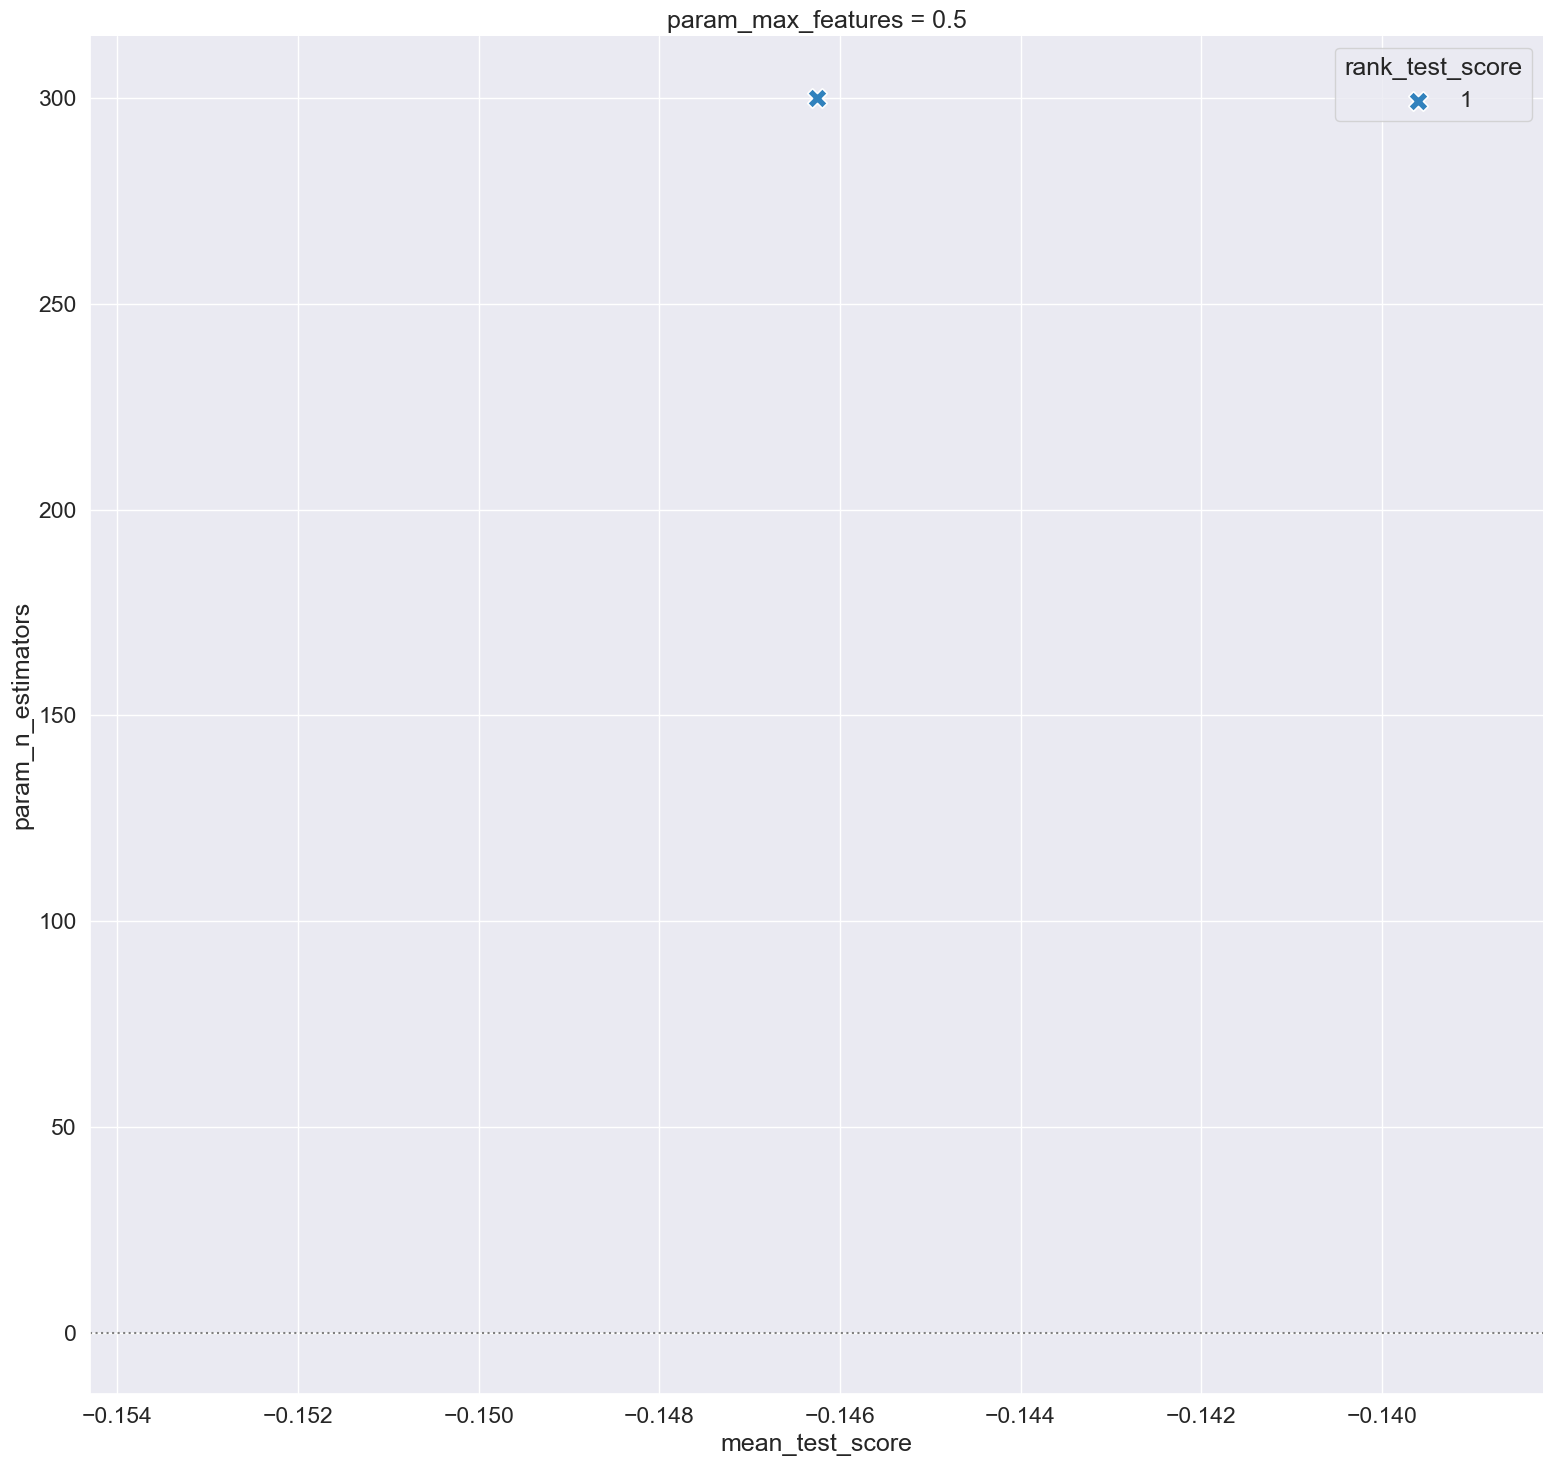

In [55]:
# Building a random forest
from sklearn.ensemble import RandomForestRegressor

# Set paramters for Grid Search
param_grid = {
    "n_estimators": [300],
    "max_features": [0.5],
}
# Initialise the random forest model
RFR = RandomForestRegressor(n_jobs=-1, random_state=42, bootstrap=True)

Tuned_RFR = model_pipeline(RFR, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(
    Tuned_RFR,
    ["param_max_features"],
    "param_n_estimators",
    "mean_test_score",
    "RandomForest",
)